# STAT 222: Homework 2
## 1. Posterior Inference for one sample problems using DP priors
Consider data = $(y_1, ..., y_n)$, and the following DP-based nonparametric model:

$$
Y_i|G \stackrel{iid}{\sim} \ G, \quad i = 1, ... ,n \\
G \sim DP(\alpha,G_0) \\
$$
with $G_0 = N(m, s^2)$ for fixed $m, s^2,$ and  $\alpha$. 

The objective here is to use simulated data to study posterior inference results for $G$ under different prior choices for $M$ and $G_0$, different underlying distributions that generate the data, and different sample sizes. In particular,  consider:

* two data generating distributions: 1) a N(0; 1) distribution, and 2) the mixture of normal distributions which yields a bimodal c.d.f. with heavy right tail,

$$
0.5 \cdot N(-2.5, \ 0.5^2) + 0.3 \cdot N(0.5, \ 0.7^2) + 0.2 \cdot N(1.5,\ 2^2)
$$

* sample sizes n = 20, n = 200, and n = 2000.

Use three values of $\alpha$, say, 5 and 100.

Discuss prior specification for the DP prior parameters $m, s^2$. For each of the 6 data sets corresponding to the combinations above, obtain posterior point and interval estimates for the c.d.f. $G$ and discuss how well the model fits the data. Perform a prior sensitivity analysis to study the effect of $m, s^2, \alpha$ on the posterior estimates for $G$.

In [1]:
import numpy as np
from scipy.stats import norm, dirichlet, beta
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
np.random.seed(1)

In [2]:
def DirPriorSample(data, samples = 5, N = 50, alpha = 5, mean = 0, sd = 1):
    # Sort the data
    data = np.sort(data)
    
    # Interval bound
    bound = np.amax([np.max(np.absolute(data)), mean-4*sd, mean+4*sd]) # not necessary
    
    # Discretization of the space
    x = np.linspace(-bound, bound, N+1) # just (-4,4)
    
    # Count the number of points
    data_vec = np.zeros(N+2)
    
    # Count the number of points in each interval
    j = 1
    for i in range(1,N+1):
        while((data[j] <= x[i]) and (j < len(data)-1) ):
            data_vec[i] = data_vec[i] + 1
            j = j + 1
            
    # Probability measure for each interval
    y =np.zeros(N+1)
    y[0] = norm.cdf(x[0], mean, sd)
    for i in range(1,N+1):
        y[i] = norm.cdf(x[i], mean, sd) - norm.cdf(x[i-1], mean, sd)
        
    y = np.append(y, 1 - norm.cdf(x[N], mean, sd))
    
    # Creating the non-negative measures
    param = alpha * y + data_vec
    
    # Samplind from the dirichlet distribution
    samp_dir = dirichlet.rvs(param, samples)
    
    # Generating the CDF
    draw = np.cumsum(samp_dir.T, axis = 0)
    return np.array([draw, bound])

In order to simulate from the posterior distribution, Ferguson's definition of the DP is used, modifying the parameters of the Dirichlet distribution with a vector that counts the number of points coming from the data that fall in each interval. 
* In the first case we draw samples from a $N(0,1)$ distribution, with a sample size of 20, 200, and 2000.

In [3]:
mu, sigma = 0, 1
s1 = np.random.normal(mu, sigma, 20)
s2 = np.random.normal(mu, sigma, 200)
s3 =  np.random.normal(mu, sigma, 2000)

For each simulation I will generate 10 posterior distribution.

Text(0, 0.5, '$\\alpha = 100$, n = 20')

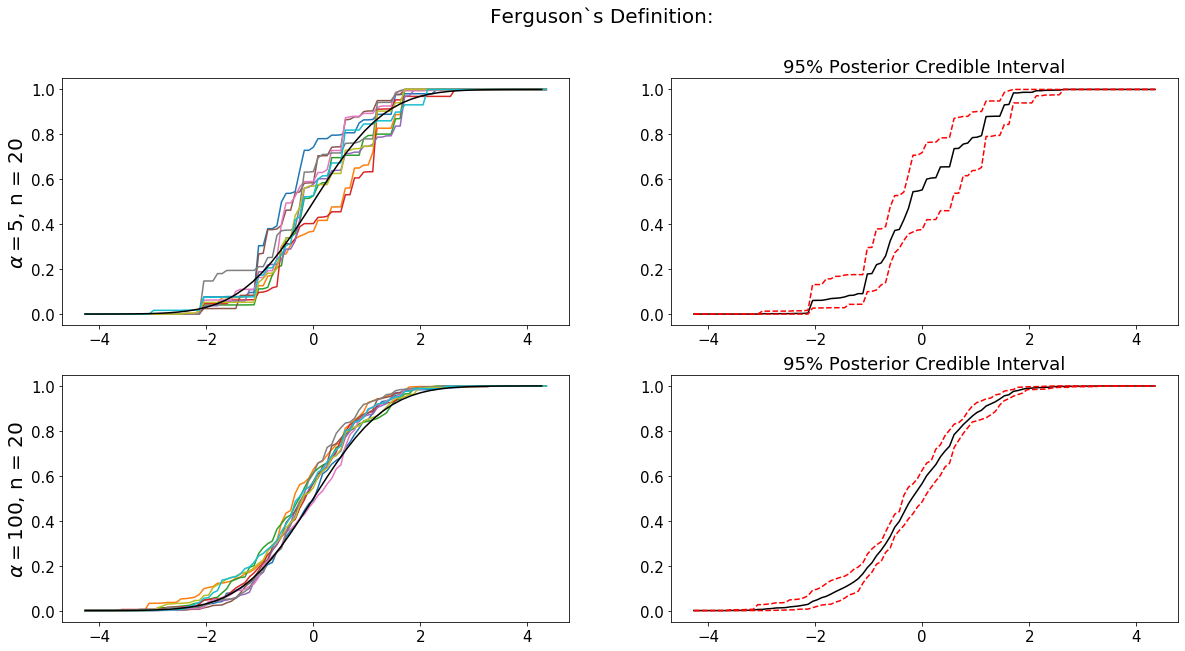

In [4]:
N = 100
samples = 10

# Use the function to generate 10 posterior samples
draws1 = DirPriorSample(data = s1, samples = samples, N = N, mean = np.mean(s1), sd = np.std(s1), alpha=5)
results1 = draws1[0]

draws2 = DirPriorSample(data = s1, samples = samples, N = N, mean = np.mean(s1), sd = np.std(s1), alpha=100)
results2 = draws2[0]

# Setup the credible interval calculation
mean_fn1 = np.mean(results1, axis = 1)
CI_fn1 = np.quantile(results1, axis = 1, q = [0.025, 0.975])

# Setup the credible interval calculation
mean_fn2 = np.mean(results2, axis = 1)
CI_fn2 = np.quantile(results2, axis = 1, q = [0.025, 0.975])


xx = np.append(np.linspace(-draws2[1], draws2[1], N+1),
              np.abs(draws2[1]) + (np.abs(draws2[1]) + np.abs(draws2[1])  )/N )
# Plot the results
fig, axs = plt.subplots(2, 2, figsize = (20,10))
fig.suptitle(r'Ferguson`s Definition:',fontsize=20)
axs[0, 0].plot(xx, results1)
axs[0, 0].plot(np.linspace(-draws1[1], draws1[1]), norm.cdf(np.linspace(-4,4)), color = "black")
axs[0, 0].set_title(r'', fontsize=18)
axs[0, 0].tick_params(axis='both', which='major', labelsize=15)

axs[0, 1].plot(xx, mean_fn1,'-', color = "black")
axs[0, 1].plot(xx, CI_fn1[0,:],'--', color = "red")
axs[0, 1].plot(xx, CI_fn1[1,:],'--', color = "red")
axs[0, 1].set_title('95% Posterior Credible Interval', fontsize = 18)
axs[0, 1].tick_params(axis='both', which='major', labelsize=15)

axs[1, 0].plot(xx, results2)
axs[1, 0].plot(np.linspace(-draws2[1], draws2[1]), norm.cdf(np.linspace(-4,4)), color = "black")
axs[1, 0].set_title(r'', fontsize=18)
axs[1, 0].tick_params(axis='both', which='major', labelsize=15)


axs[1, 1].plot(xx, mean_fn2,'-', color = "black")
axs[1, 1].plot(xx, CI_fn2[0,:],'--', color = "red")
axs[1, 1].plot(xx, CI_fn2[1,:],'--', color = "red")
axs[1, 1].set_title('95% Posterior Credible Interval', fontsize = 18)
axs[1, 1].tick_params(axis='both', which='major', labelsize=15)

axs[0,0].set_ylabel(r'$\alpha = 5$, n = 20', fontsize = 20)
axs[1,0].set_ylabel(r'$\alpha = 100$, n = 20', fontsize = 20)

In this case, where $n=20$, changing $\alpha$ changes the posterior distributions, because the dataset alone is too small to condition the posteriors to become more similar to the normal distribution. It's like if we are forcing the normal behavior of the posterior by increasing our confidence in the normal prior and decrease our confidence in the data.

As we can see in the next plots, as $\alpha$ increases, the length of the $95\%$ credible interval gets smaller. This is due to the decrease of the variance as $\alpha$ grows.

Text(0, 0.5, '$\\alpha = 100$, n = 200')

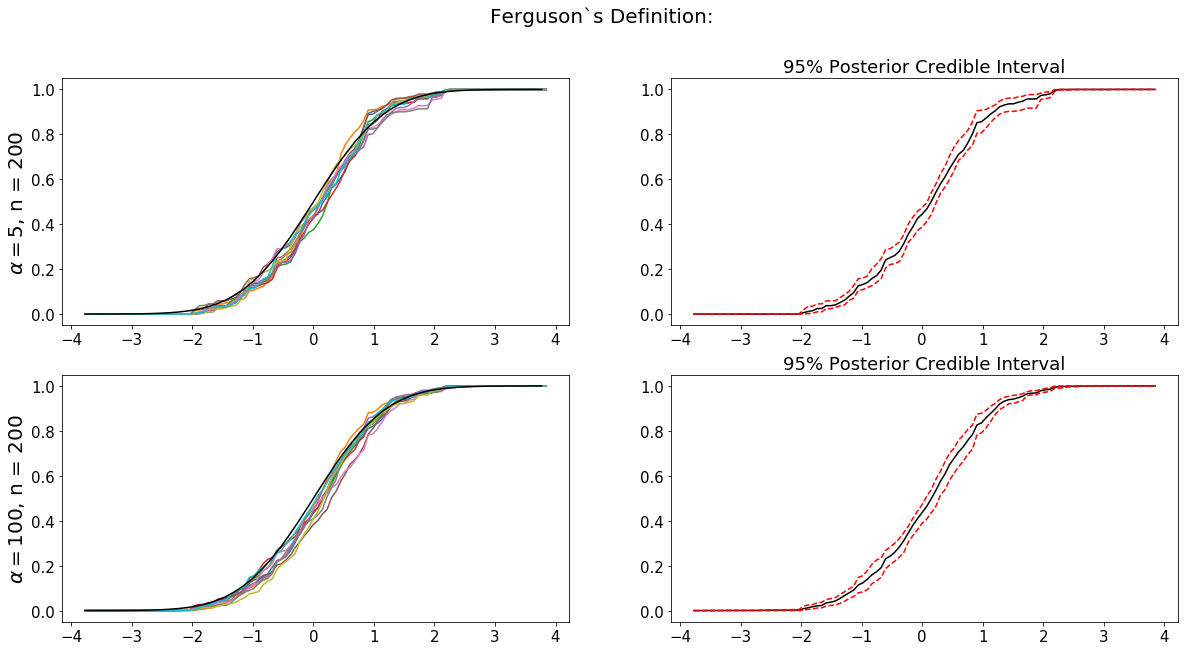

In [5]:
# Use the function to generate 10 posterior samples
draws1 = DirPriorSample(data = s2, samples = samples, N = N, mean = np.mean(s2), sd = np.std(s2), alpha=5)
results1 = draws1[0]

draws2 = DirPriorSample(data = s2, samples = samples, N = N, mean = np.mean(s2), sd = np.std(s2), alpha=100)
results2 = draws2[0]

# Setup the credible interval calculation
mean_fn1 = np.mean(results1, axis = 1)
CI_fn1 = np.quantile(results1, axis = 1, q = [0.025, 0.975])

# Setup the credible interval calculation
mean_fn2 = np.mean(results2, axis = 1)
CI_fn2 = np.quantile(results2, axis = 1, q = [0.025, 0.975])


xx = np.append(np.linspace(-draws2[1], draws2[1], N+1),
              np.abs(draws2[1]) + (np.abs(draws2[1]) + np.abs(draws2[1])  )/N )
# Plot the results
fig, axs = plt.subplots(2, 2, figsize = (20,10))
fig.suptitle(r'Ferguson`s Definition:',fontsize=20)
axs[0, 0].plot(xx, results1)
axs[0, 0].plot(np.linspace(-draws1[1], draws1[1]), norm.cdf(np.linspace(-4,4)), color = "black")
axs[0, 0].set_title(r'', fontsize=18)
axs[0, 0].tick_params(axis='both', which='major', labelsize=15)

axs[0, 1].plot(xx, mean_fn1,'-', color = "black")
axs[0, 1].plot(xx, CI_fn1[0,:],'--', color = "red")
axs[0, 1].plot(xx, CI_fn1[1,:],'--', color = "red")
axs[0, 1].set_title('95% Posterior Credible Interval', fontsize = 18)
axs[0, 1].tick_params(axis='both', which='major', labelsize=15)

axs[1, 0].plot(xx, results2)
axs[1, 0].plot(np.linspace(-draws2[1], draws2[1]), norm.cdf(np.linspace(-4,4)), color = "black")
axs[1, 0].set_title(r'', fontsize=18)
axs[1, 0].tick_params(axis='both', which='major', labelsize=15)


axs[1, 1].plot(xx, mean_fn2,'-', color = "black")
axs[1, 1].plot(xx, CI_fn2[0,:],'--', color = "red")
axs[1, 1].plot(xx, CI_fn2[1,:],'--', color = "red")
axs[1, 1].set_title('95% Posterior Credible Interval', fontsize = 18)
axs[1, 1].tick_params(axis='both', which='major', labelsize=15)

axs[0,0].set_ylabel(r'$\alpha = 5$, n = 200', fontsize = 20)
axs[1,0].set_ylabel(r'$\alpha = 100$, n = 200', fontsize = 20)

Text(0, 0.5, '$\\alpha = 100$, n = 2000')

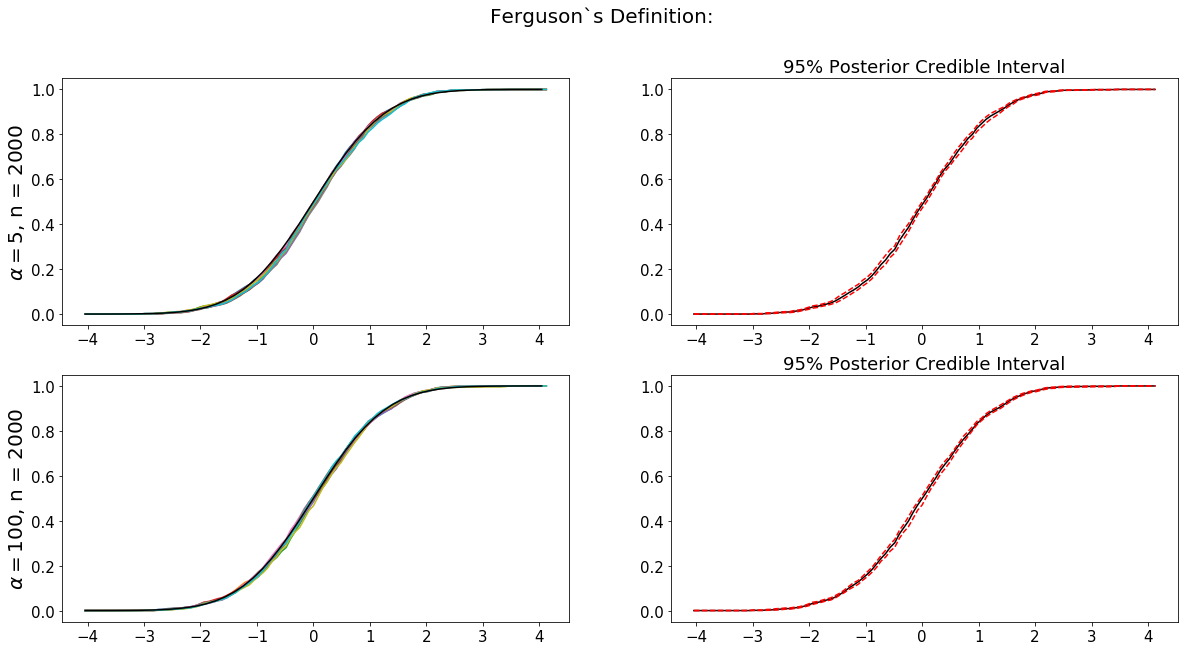

In [6]:
# Use the function to generate 10 posterior samples
draws1 = DirPriorSample(data = s3, samples = samples, N = N, mean = np.mean(s3), sd = np.std(s3), alpha=5)
results1 = draws1[0]

draws2 = DirPriorSample(data = s3, samples = samples, N = N, mean = np.mean(s3), sd = np.std(s3), alpha=100)
results2 = draws2[0]

# Setup the credible interval calculation
mean_fn1 = np.mean(results1, axis = 1)
CI_fn1 = np.quantile(results1, axis = 1, q = [0.025, 0.975])

# Setup the credible interval calculation
mean_fn2 = np.mean(results2, axis = 1)
CI_fn2 = np.quantile(results2, axis = 1, q = [0.025, 0.975])


xx = np.append(np.linspace(-draws2[1], draws2[1], N+1),
              np.abs(draws2[1]) + (np.abs(draws2[1]) + np.abs(draws2[1])  )/N )
# Plot the results
fig, axs = plt.subplots(2, 2, figsize = (20,10))
fig.suptitle(r'Ferguson`s Definition:',fontsize=20)
axs[0, 0].plot(xx, results1)
axs[0, 0].plot(np.linspace(-draws1[1], draws1[1]), norm.cdf(np.linspace(-4,4)), color = "black")
axs[0, 0].set_title(r'', fontsize=18)
axs[0, 0].tick_params(axis='both', which='major', labelsize=15)

axs[0, 1].plot(xx, mean_fn1,'-', color = "black")
axs[0, 1].plot(xx, CI_fn1[0,:],'--', color = "red")
axs[0, 1].plot(xx, CI_fn1[1,:],'--', color = "red")
axs[0, 1].set_title('95% Posterior Credible Interval', fontsize = 18)
axs[0, 1].tick_params(axis='both', which='major', labelsize=15)

axs[1, 0].plot(xx, results2)
axs[1, 0].plot(np.linspace(-draws2[1], draws2[1]), norm.cdf(np.linspace(-4,4)), color = "black")
axs[1, 0].set_title(r'', fontsize=18)
axs[1, 0].tick_params(axis='both', which='major', labelsize=15)


axs[1, 1].plot(xx, mean_fn2,'-', color = "black")
axs[1, 1].plot(xx, CI_fn2[0,:],'--', color = "red")
axs[1, 1].plot(xx, CI_fn2[1,:],'--', color = "red")
axs[1, 1].set_title('95% Posterior Credible Interval', fontsize = 18)
axs[1, 1].tick_params(axis='both', which='major', labelsize=15)

axs[0,0].set_ylabel(r'$\alpha = 5$, n = 2000', fontsize = 20)
axs[1,0].set_ylabel(r'$\alpha = 100$, n = 2000', fontsize = 20)

Now, we will use data that comes from a finite mixture of normal distributions. The real density is plotted using 20000 samples from the mixture and will be used to check the results

In [7]:
def rmix(n, pi, mu, sigma):
    z = np.random.choice(len(pi), n, p=pi, replace = True)
    x = np.random.normal(mu[z], sigma[z], n)
    return x

In [8]:
nmix1 = rmix(n =20, pi = np.array([0.5,0.3,0.2]), mu = np.array([-2.5, 0.5, 1.5]),
    sigma = np.array([0.5, 0.7, 2]))
nmix2 = rmix(n =200, pi = np.array([0.5,0.3,0.2]), mu = np.array([-2.5, 0.5, 1.5]),
    sigma = np.array([0.5, 0.7, 2]))
nmix3 = rmix(n =2000, pi = np.array([0.5,0.3,0.2]), mu = np.array([-2.5, 0.5, 1.5]),
    sigma = np.array([0.5, 0.7, 2]))

### This dataset will be used to generate the "real" cdf of the finite mixture
mix_true = rmix(n =20000, pi = np.array([0.5,0.3,0.2]), mu = np.array([-2.5, 0.5, 1.5]),
    sigma = np.array([0.5, 0.7, 2]))

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 <a list of 9 Text yticklabel objects>)

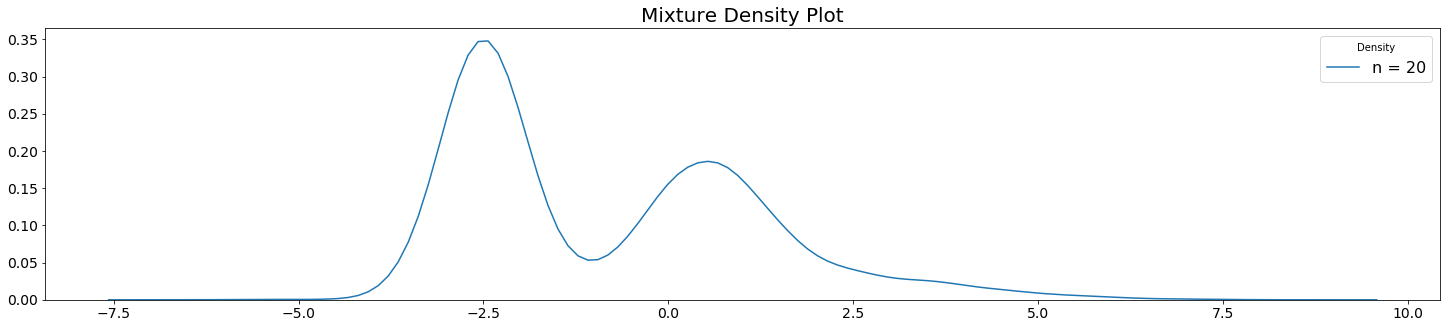

In [18]:
import seaborn as sns
# Plot the "real" distribution
plt.subplots(figsize = (20,5))
plt.title("Mixture Density Plot", fontsize=20)

# the histogram of the data
sns.distplot(mix_true, hist=False, rug=False, label = "n = 20")
# sns.distplot(nmix2, hist=False, rug=False, label = "n = 200")
# sns.distplot(nmix3, hist=False, rug=False, label = "n = 2000")
plt.legend(prop={'size': 16}, title = 'Density')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

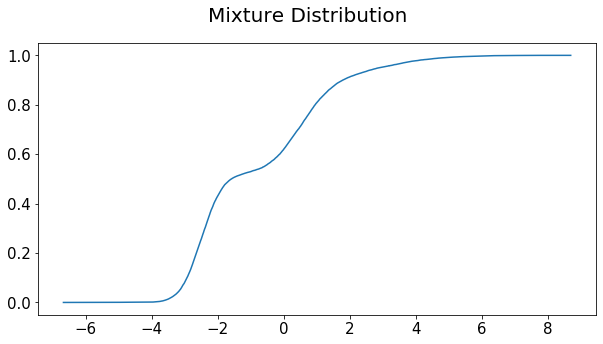

In [10]:
# Plot the results
fig, axs = plt.subplots(1, 1, figsize = (10,5))
fig.suptitle("Mixture Distribution",fontsize=20)
axs.plot(np.sort(mix_true), np.linspace(1/20000, 1, len(mix_true)))
axs.tick_params(axis='both', which='major', labelsize=15)



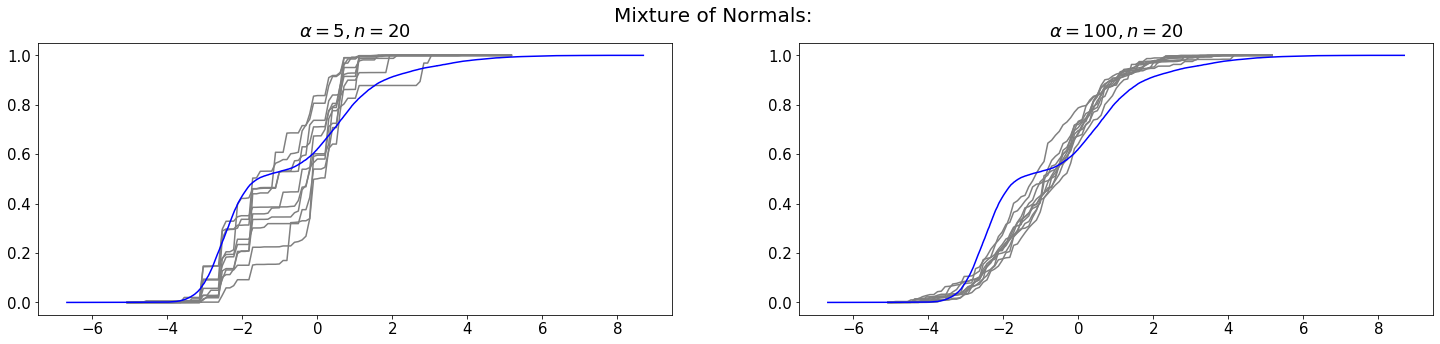

In [14]:
N = 100
samples = 10

draws = DirPriorSample(samples = samples, N = N, data = nmix1, 
                       alpha = 5, mean = np.mean(nmix1), sd = np.std(nmix1))
results = draws[0]

draws2 = DirPriorSample(samples = samples, N = N, data = nmix1, 
                       alpha = 100, mean = np.mean(nmix1), sd = np.std(nmix1))
results2 = draws2[0]


xx = np.append(np.linspace(-draws2[1], draws2[1], N+1),
              np.abs(draws2[1]) + (np.abs(draws2[1]) + np.abs(draws2[1])  )/N )
# Plot the results
fig, axs = plt.subplots(1, 2, figsize = (25,5))
fig.suptitle(r'Mixture of Normals:',fontsize=20)
axs[0].plot(xx, results, color = "gray")
axs[0].plot(np.sort(mix_true), np.linspace(1/20000, 1, len(mix_true)), 
            color = "blue", label = "True Density")
axs[0].set_title(r'$\alpha = 5, n = 20$', fontsize = 18)
axs[0].tick_params(axis='both', which='major', labelsize=15)

xx = np.append(np.linspace(-draws[1], draws[1], N+1),
              np.abs(draws[1]) + (np.abs(draws[1]) + np.abs(draws[1])  )/N )
axs[1].plot(xx, results2, color = "gray", label = "Prior Draws")
axs[1].plot(np.sort(mix_true), np.linspace(1/20000, 1, len(mix_true)), 
            color = "blue", label = "True Mixture Distribution")
axs[1].set_title(r'$\alpha = 100, n = 20$', fontsize = 18)
axs[1].tick_params(axis='both', which='major', labelsize=15)


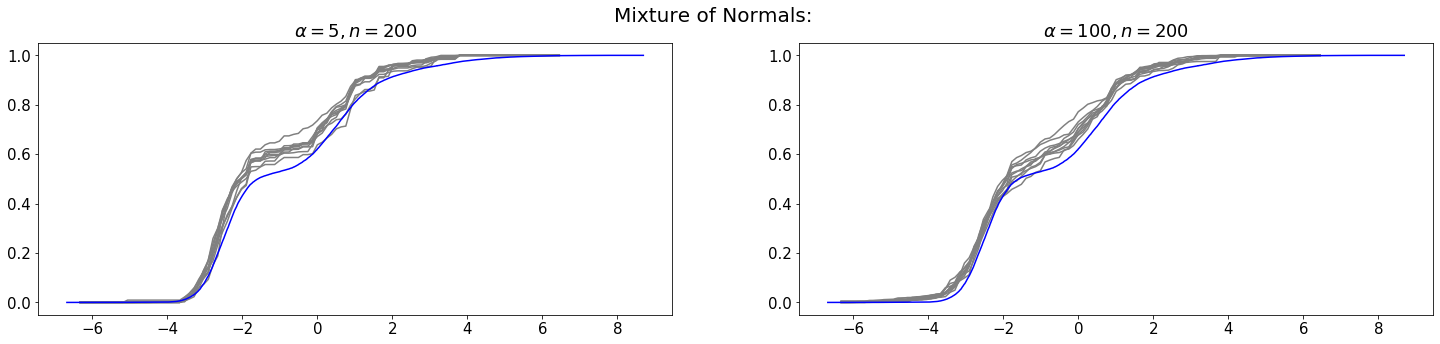

In [15]:
N = 100
samples = 10

draws = DirPriorSample(samples = samples, N = N, data = nmix2, 
                       alpha = 5, mean = np.mean(nmix2), sd = np.std(nmix2))
results = draws[0]

draws2 = DirPriorSample(samples = samples, N = N, data = nmix2, 
                       alpha = 100, mean = np.mean(nmix2), sd = np.std(nmix2))
results2 = draws2[0]


xx = np.append(np.linspace(-draws[1], draws[1], N+1),
              np.abs(draws[1]) + (np.abs(draws[1]) + np.abs(draws[1])  )/N )
# Plot the results
fig, axs = plt.subplots(1, 2, figsize = (25,5))
fig.suptitle(r'Mixture of Normals:',fontsize=20)
axs[0].plot(xx, results, color = "grey")
axs[0].set_title(r'$\alpha = 5, n = 200$', fontsize = 18)
axs[0].plot(np.sort(mix_true), np.linspace(1/20000, 1, len(mix_true)), color = "blue")
axs[0].tick_params(axis='both', which='major', labelsize=15)

xx = np.append(np.linspace(-draws2[1], draws2[1], N+1),
              np.abs(draws2[1]) + (np.abs(draws2[1]) + np.abs(draws2[1])  )/N )

axs[1].plot(xx, results2, color = "grey")
axs[1].set_title(r'$\alpha = 100, n = 200$', fontsize = 18)
axs[1].plot(np.sort(mix_true), np.linspace(1/20000, 1, len(mix_true)), color = "blue")
axs[1].tick_params(axis='both', which='major', labelsize=15)


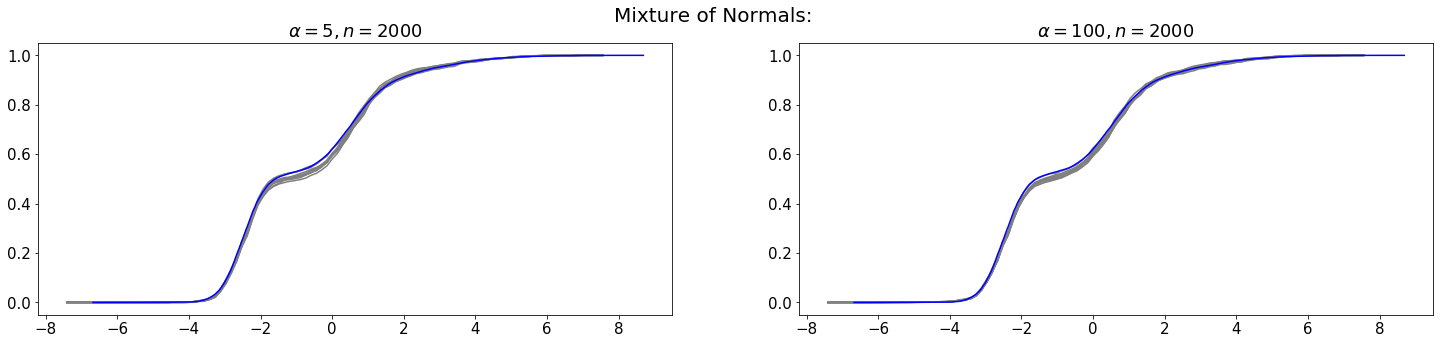

In [16]:
N = 100
samples = 10

draws = DirPriorSample(samples = samples, N = N, data = nmix3, 
                       alpha = 5, mean = np.mean(nmix3), sd = np.std(nmix3))
results = draws[0]

draws2 = DirPriorSample(samples = samples, N = N, data = nmix3, 
                       alpha = 100, mean = np.mean(nmix3), sd = np.std(nmix3))
results2 = draws2[0]


xx = np.append(np.linspace(-draws[1], draws[1], N+1),
              np.abs(draws[1]) + (np.abs(draws[1]) + np.abs(draws[1])  )/N )
# Plot the results
fig, axs = plt.subplots(1, 2, figsize = (25,5))
fig.suptitle(r'Mixture of Normals:',fontsize=20)
axs[0].plot(xx, results, color = "gray")
axs[0].plot(np.sort(mix_true), np.linspace(1/20000, 1, len(mix_true)), color = "blue")
axs[0].set_title(r'$\alpha = 5, n = 2000$', fontsize = 18)
axs[0].tick_params(axis='both', which='major', labelsize=15)

axs[1].plot(xx, results2, color = "gray")
axs[1].plot(np.sort(mix_true), np.linspace(1/20000, 1, len(mix_true)), color = "blue")
axs[1].set_title(r'$\alpha = 100, n = 2000$', fontsize = 18)
axs[1].tick_params(axis='both', which='major', labelsize=15)
